# 01. Load Data

02. Load CSV files into Dataframes and optionally process

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

import datautil as du
from analysis_util_01 import MMM, MMMChannelsStraight, MMMChannelsStraightConfounder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/workspaces/mmm_experiments/Mongine/analysis_util_01.py:84: SyntaxWarning: invalid escape sequence '\%'
  label=f"${100 * hdi_prob}\%$ HDI",


In [60]:
data = du.get_collected_dataframe()
# create an index col for easy plotting
data['dt'] = data['date']
data.set_index('dt', inplace=True)
data.head()

,date,impressions,clicks,purchases,spend_fb,spend_google,sales
dt,,,,,,,
2023-09-13,2023-09-13,158057.0,2863.0,7.0,1044.52,17731.458630,125087.3010
2023-09-14,2023-09-14,110849.0,1691.0,6.0,746.37,15614.170441,142865.4874
2023-09-15,2023-09-15,0.0,0.0,8.0,0.00,11892.922135,200679.1577
2023-09-16,2023-09-16,0.0,0.0,8.0,0.00,10958.380107,120231.9569
2023-09-17,2023-09-17,0.0,0.0,6.0,0.00,14914.932425,166163.5059


# 02. Explore data

<Axes: >

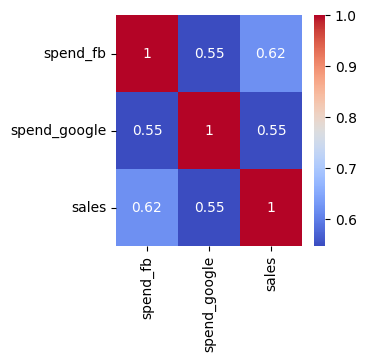

In [61]:
# correlation of media spend with sales
corr = data[["spend_fb", "spend_google", "sales"]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)

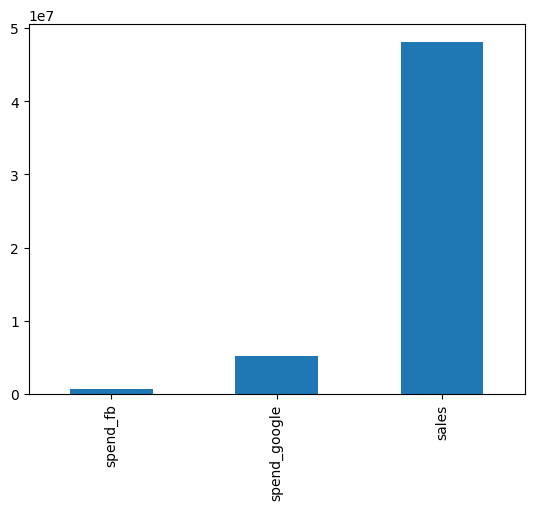

In [62]:
data[["spend_fb", "spend_google", "sales"]].sum().plot(kind='bar')
plt.show()

<Axes: xlabel='dt'>

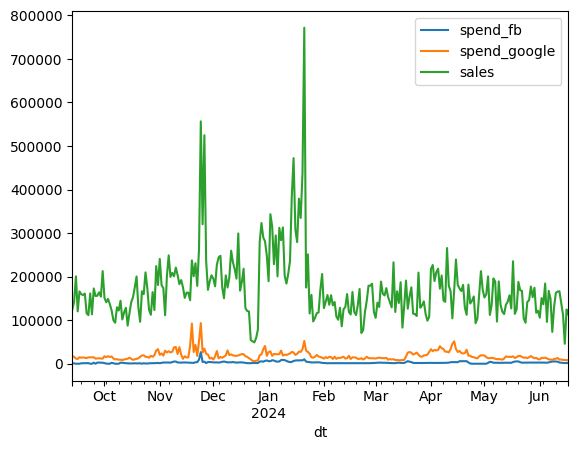

In [63]:
fig, ax = plt.subplots()
data[["spend_fb", "spend_google", "sales"]].plot(ax=ax)

<Axes: xlabel='dt'>

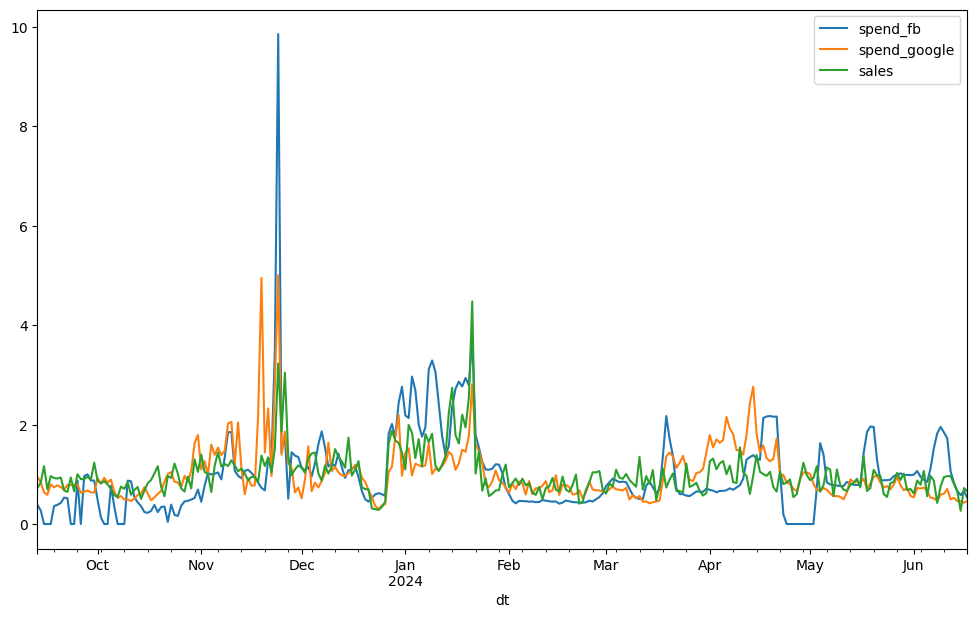

In [64]:
cols = ["spend_fb", "spend_google", "sales"]
df = data[cols].copy()
for key in cols:
    avg = df[key].mean()
    df[key] = df[key] * 1 / avg

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
df[["spend_fb", "spend_google", "sales"]].plot(ax=ax)

# 03. Model 

In [65]:
mmm = MMMChannelsStraightConfounder(data, ["spend_google", "spend_fb"])
# mmm = MMMChannelsStraight(data, ["spend_google", "spend_fb"], allowIntercept=True)
mmm.define_model()


In [66]:
mmm.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, intercept, beta_fb, beta_google, beta_fb_google, spend_google_0, sigma_google]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


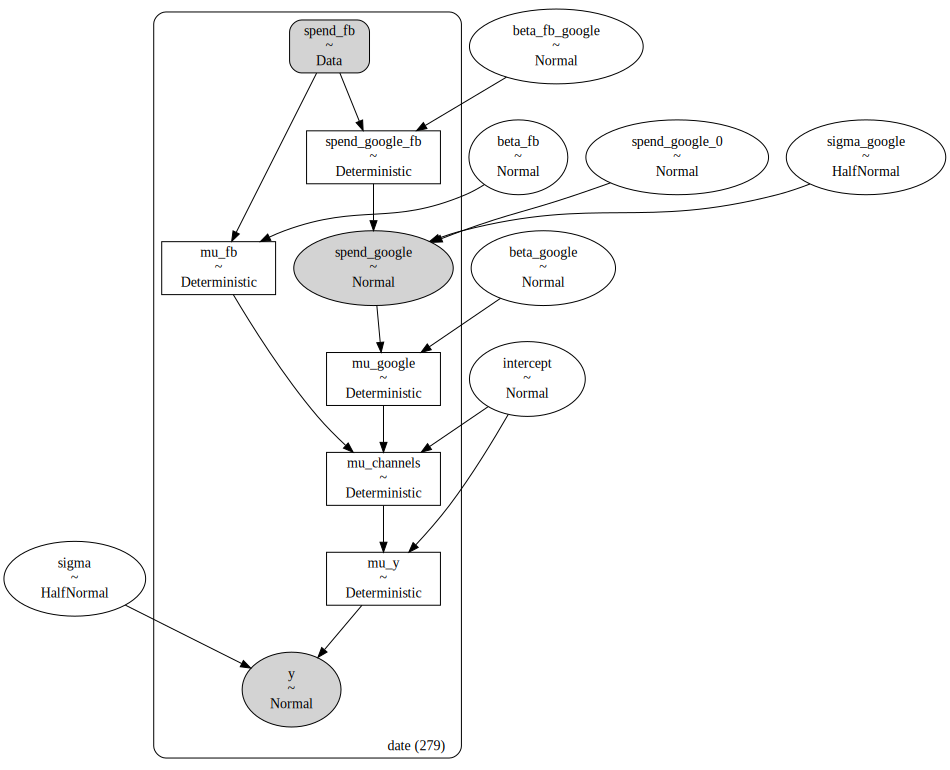

In [67]:
pm.model_to_graphviz(model=mmm.model)

Sampling: [spend_google]


Output()

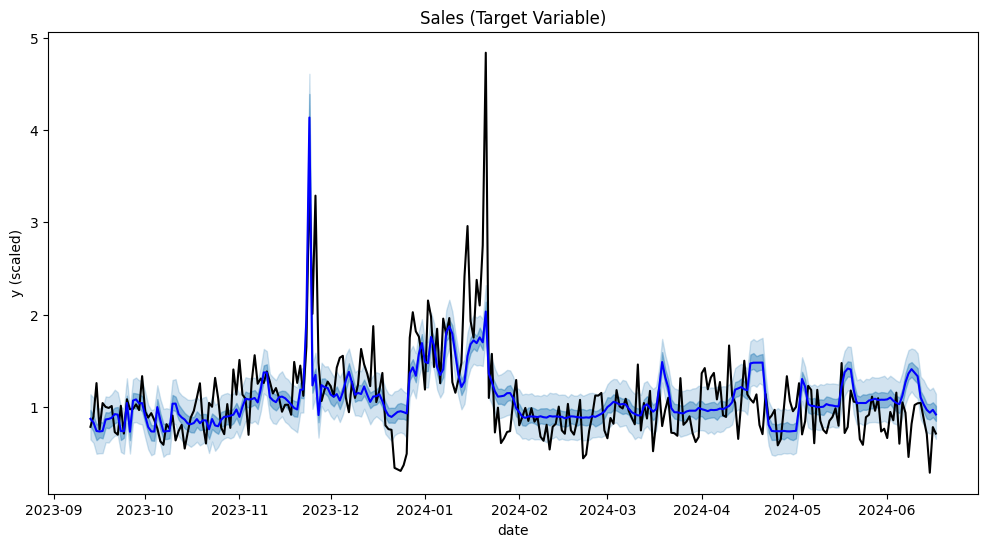

In [68]:
mmm.plot_posterior_predictive()

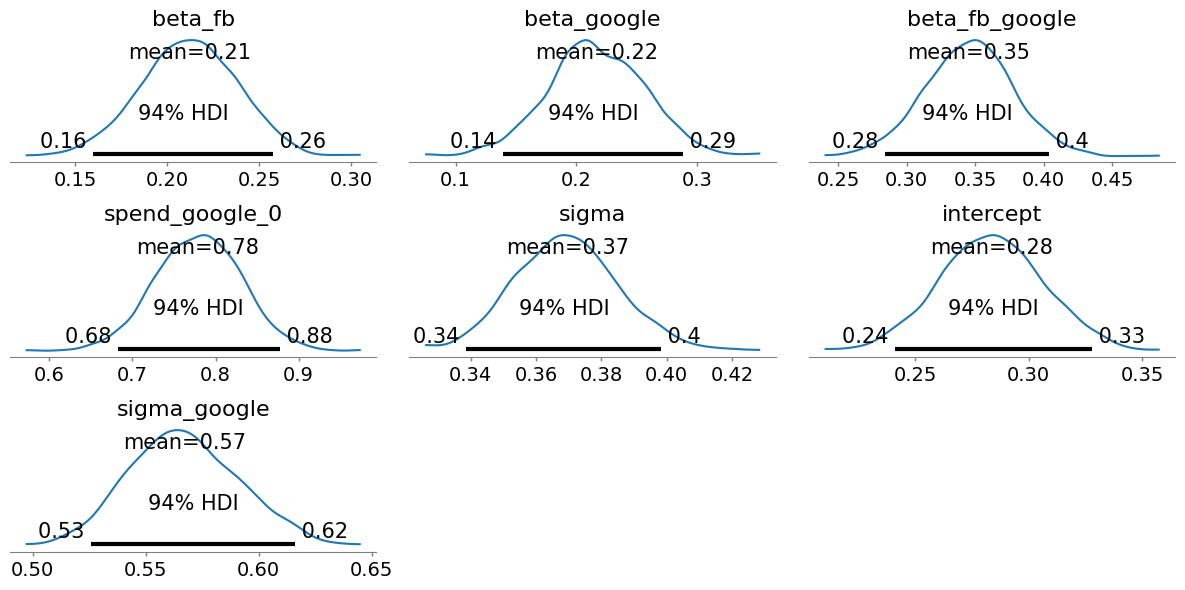

In [69]:
mmm.plot_parm_dist()